In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes

import pandas as pd
import matplotlib.image as mpimg
import glob
import re
from matplotlib import colors
import sys
sys.path.append('../')
from functions import *

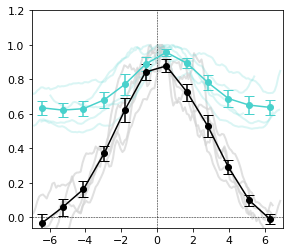

In [76]:
scope_calibration = 0.105
path = "../../dat/PRC1_localization/"
spindles = ["cell002", "cell005", "cell006", "cell009","cell010"] #["cell010"]#
shifts = [6.7, 4.6, 7.1, 6.2, 8.4] #[8.4]#


plt.figure(figsize=(4.5,4))

x_all,y_all,y2_all = [],[],[]
for i, spindle in enumerate(spindles):
        
    shift = shifts[i] - 0.25

    # PRC1 data
    prc1_bg_df = pd.read_csv(path + spindle + '/prc1_bg.csv')
    prc1_bg = np.mean(prc1_bg_df['Mean'])

    prc1_parallel_df = pd.read_csv(path + spindle + '/prc1_parallel.csv')
    prc1_parallel = prc1_parallel_df['Mean'].values

    prc1_free_df = pd.read_csv(path + spindle + '/prc1_free.csv')
    prc1_free = np.mean(prc1_free_df['Mean'])

    prc1_df = pd.read_csv(path + spindle + '/prc1_1.csv')
    x_ls = prc1_df['X'].values
    prc1 = prc1_df['Y'].values

    # Tubulin data
    tubulin_bg_df = pd.read_csv(path + spindle + '/tub_bg.csv')
    tubulin_bg = np.mean(tubulin_bg_df['Mean'])

    tubulin_parallel_df = pd.read_csv(path + spindle + '/tub_parallel.csv')
    tubulin_parallel = tubulin_parallel_df['Mean'].values

    tubulin_free_df = pd.read_csv(path + spindle + '/tub_free.csv')
    tubulin_free = np.mean(tubulin_free_df['Mean'])

    tubulin_df = pd.read_csv(path + spindle + '/tub_1.csv')
    tubulin = tubulin_df['Y'].values
    
    
    # Analysis
    cf_over_Kd = (prc1_parallel - prc1_free)/(tubulin_parallel - tubulin_bg)
    prc1_active = prc1 - prc1_free - np.mean(cf_over_Kd) * (tubulin - tubulin_bg)
    prc1_all_but_active = prc1 - prc1_bg - prc1_active
    y = prc1_active/(tubulin - tubulin_bg)
    y2 = prc1/(tubulin - tubulin_bg)
    y3 = np.mean(cf_over_Kd)/(tubulin - tubulin_bg)
    x_all.extend(list(x_ls*scope_calibration - shift))
    y_all.extend(list(y/y.max()))
    y2_all.extend(list(y2/y2.max()))
    
    plt.plot(x_ls*scope_calibration - shift, y/y.max(), color='lightgray', lw=2.0, alpha=0.7)
    plt.plot(x_ls*scope_calibration - shift, y2/y2.max(), color='mediumturquoise', lw=2.0, alpha=0.2)
    
x_all = np.array(x_all)
y_all = np.array(y_all)
y2_all = np.array(y2_all)
y_all = y_all[x_all > -7]
y2_all = y2_all[x_all > -7]
x_all = x_all[x_all > -7]

nbins = 12
n, _ = np.histogram(x_all, bins=nbins)
sy, _ = np.histogram(x_all, bins=nbins, weights=y_all)
sy2, _ = np.histogram(x_all, bins=nbins, weights=y_all*y_all)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)
# plt.scatter(dist_lls,time_lls, s=70, color='lightblue',ec='k')
plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std/np.sqrt(len(spindles)), fmt='o-',color='k',capsize=5,zorder=10)    

sy, _ = np.histogram(x_all, bins=nbins, weights=y2_all)
sy2, _ = np.histogram(x_all, bins=nbins, weights=y2_all*y2_all)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)
# plt.scatter(dist_lls,time_lls, s=70, color='lightblue',ec='k')
plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std/np.sqrt(len(spindles)), fmt='o-',color='mediumturquoise',capsize=5,zorder=10)    
    
plt.axvline(0, color='k', lw=0.5, ls='--')
plt.axhline(0, color='k', lw=0.5, ls='--')
# plt.xlabel('position from spindle midplane (μm)', fontsize=13)
# plt.ylabel(r'normalized [PRC1]$_{\rm engaged}$', fontsize=13)
plt.xlim([-7, 7])
plt.ylim([-0.06, 1.2])
plt.xticks([-6, -4, -2, 0, 2, 4, 6])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.savefig('fig_outputs/separating_PRC1_levels.pdf')
plt.show()

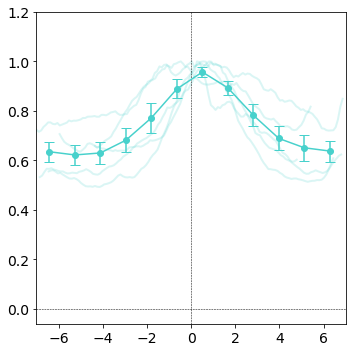

In [83]:
scope_calibration = 0.105
path = "../../dat/PRC1_localization/"
spindles = ["cell002", "cell005", "cell006", "cell009","cell010"] #["cell010"]#
shifts = [6.7, 4.6, 7.1, 6.2, 8.4] #[8.4]#


plt.figure(figsize=(5,5))

x_all,y_all,y2_all = [],[],[]
for i, spindle in enumerate(spindles):
        
    shift = shifts[i] - 0.25

    # PRC1 data
    prc1_bg_df = pd.read_csv(path + spindle + '/prc1_bg.csv')
    prc1_bg = np.mean(prc1_bg_df['Mean'])

    prc1_parallel_df = pd.read_csv(path + spindle + '/prc1_parallel.csv')
    prc1_parallel = prc1_parallel_df['Mean'].values

    prc1_free_df = pd.read_csv(path + spindle + '/prc1_free.csv')
    prc1_free = np.mean(prc1_free_df['Mean'])

    prc1_df = pd.read_csv(path + spindle + '/prc1_1.csv')
    x_ls = prc1_df['X'].values
    prc1 = prc1_df['Y'].values

    # Tubulin data
    tubulin_bg_df = pd.read_csv(path + spindle + '/tub_bg.csv')
    tubulin_bg = np.mean(tubulin_bg_df['Mean'])

    tubulin_parallel_df = pd.read_csv(path + spindle + '/tub_parallel.csv')
    tubulin_parallel = tubulin_parallel_df['Mean'].values

    tubulin_free_df = pd.read_csv(path + spindle + '/tub_free.csv')
    tubulin_free = np.mean(tubulin_free_df['Mean'])

    tubulin_df = pd.read_csv(path + spindle + '/tub_1.csv')
    tubulin = tubulin_df['Y'].values
    
    
    # Analysis
    cf_over_Kd = (prc1_parallel - prc1_free)/(tubulin_parallel - tubulin_bg)
    prc1_active = prc1 - prc1_free - np.mean(cf_over_Kd) * (tubulin - tubulin_bg)
    prc1_all_but_active = prc1 - prc1_bg - prc1_active
    y = prc1_active/(tubulin - tubulin_bg)
    y2 = prc1/(tubulin - tubulin_bg)
    y3 = np.mean(cf_over_Kd)/(tubulin - tubulin_bg)
    x_all.extend(list(x_ls*scope_calibration - shift))
    y_all.extend(list(y/y.max()))
    y2_all.extend(list(y2/y2.max()))
    
    plt.plot(x_ls*scope_calibration - shift, y2/y2.max(), color='mediumturquoise', lw=2.0, alpha=0.2)
    
x_all = np.array(x_all)
y_all = np.array(y_all)
y2_all = np.array(y2_all)
y_all = y_all[x_all > -7]
y2_all = y2_all[x_all > -7]
x_all = x_all[x_all > -7]

nbins = 12
n, _ = np.histogram(x_all, bins=nbins)
sy, _ = np.histogram(x_all, bins=nbins, weights=y2_all)
sy2, _ = np.histogram(x_all, bins=nbins, weights=y2_all*y2_all)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)
# plt.scatter(dist_lls,time_lls, s=70, color='lightblue',ec='k')
plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std/np.sqrt(len(spindles)), fmt='o-',color='mediumturquoise',capsize=5,zorder=10)    
    
plt.axvline(0, color='k', lw=0.5, ls='--')
plt.axhline(0, color='k', lw=0.5, ls='--')
# plt.xlabel('position from spindle midplane (μm)', fontsize=13)
# plt.ylabel(r'normalized [PRC1]$_{\rm engaged}$', fontsize=13)
plt.xlim([-7, 7])
plt.ylim([-0.06, 1.2])
plt.xticks([-6, -4, -2, 0, 2, 4, 6])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('fig_outputs/supp_PRC1intensity.pdf')
plt.show()